In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 
# Maximum display of columns
pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 400

In [7]:
# Import data from csv
musicgroup_df = pd.read_csv('../data/MusicGroups.csv')
kpoptrend_df = pd.read_csv("../data/KpopTrend2014To2021.csv")

In [9]:
musicgroup_df.columns = musicgroup_df.columns.str.replace(' ', '_')
musicgroup_df.columns = musicgroup_df.columns.str.lower()

In [18]:
## Handle the Null Values
musicgroup_df.disband_year.fillna('0', inplace = True)
musicgroup_df.disband_year = musicgroup_df.disband_year.astype(int)

In [19]:
musicgroup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   group_name                   699 non-null    object
 1   company                      699 non-null    object
 2   group_type                   699 non-null    object
 3   debute_year                  699 non-null    int64 
 4   disband_year                 699 non-null    int32 
 5   current_status               699 non-null    object
 6   social_accounts              699 non-null    int64 
 7   inactive_members             699 non-null    int64 
 8   current_members              699 non-null    int64 
 9   original_members_remainding  699 non-null    int64 
 10  initial_members              699 non-null    int64 
 11  member_changes               699 non-null    int64 
 12  subunits                     699 non-null    int64 
 13  albums                       699 no

0         0
1      2016
2      2018
3      2015
4      2017
       ... 
694       0
695    2019
696       0
697    2016
698    2016
Name: Disband Year, Length: 699, dtype: object

In [67]:
musicgroup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Group Name                   699 non-null    object 
 1   Company                      699 non-null    object 
 2   Group Type                   699 non-null    object 
 3   Debute Year                  699 non-null    int64  
 4   Disband Year                 372 non-null    float64
 5   Current Status               699 non-null    object 
 6   Social Accounts              699 non-null    int64  
 7   Inactive Members             699 non-null    int64  
 8   Current Members              699 non-null    int64  
 9   Original Members Remainding  699 non-null    int64  
 10  Initial Members              699 non-null    int64  
 11  Member Changes               699 non-null    int64  
 12  SubUnits                     699 non-null    int64  
 13  Albums              

In [68]:
#split into disband and not disbanded
disband_df = musicgroup_df[musicgroup_df['Current Status'] == 'Disband']

In [60]:
disband_df.head()

,Group Name,Company,Group Type,Debute Year,Disband Year,Current Status,Social Accounts,Inactive Members,Current Members,Original Members Remainding,...,Digital Singles,Other Singles,Foreign Albums,Foreign Mini Albums,Foreign Other Album,Foreign Singles,Foreign Digital Singles,Foreign Other Singles,Others,Last Production Year
1,10X10,Gaon Entertainment,Female,2015.0,2016.0,Disband,2.0,0.0,6.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0
2,1NB,Trivus Entertainment,Female,2017.0,2018.0,Disband,4.0,0.0,5.0,5.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0
3,1PS,Maroo Entertainment,Female,2014.0,2015.0,Disband,3.0,0.0,5.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0
4,2EYES,SidusHQ,Female,2013.0,2017.0,Disband,2.0,0.0,4.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2015.0
5,2NE1,YG Entertainment,Female,2009.0,2017.0,Disband,5.0,0.0,3.0,3.0,...,12.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,2017.0


In [48]:
sns.pairplot(data = musicgroup_df)

<AxesSubplot:xlabel='Disband Year', ylabel='Count'>

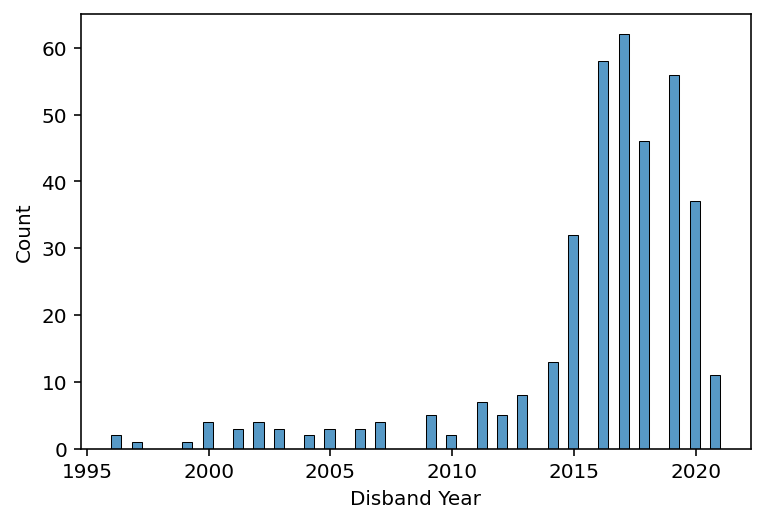

In [69]:
sns.histplot(musicgroup_df['Disband Year'],bins=60)

<AxesSubplot:xlabel='Debute Year', ylabel='Count'>

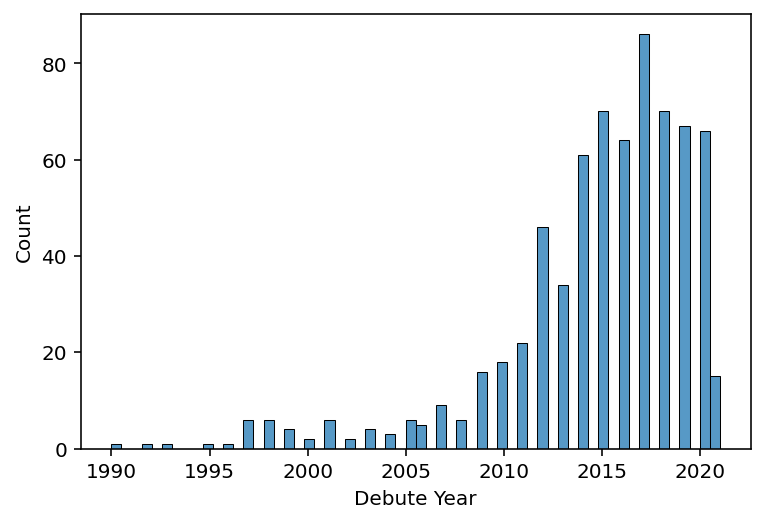

In [70]:
sns.histplot(musicgroup_df['Debute Year'],bins=60)

In [72]:
disband_df['Lifespand'] = disband_df['Disband Year'] - disband_df['Debute Year'] + 1

<ipython-input-72-a744dd34369c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disband_df['Lifespand'] = disband_df['Disband Year'] - disband_df['Debute Year'] + 1


<AxesSubplot:xlabel='Lifespand', ylabel='Count'>

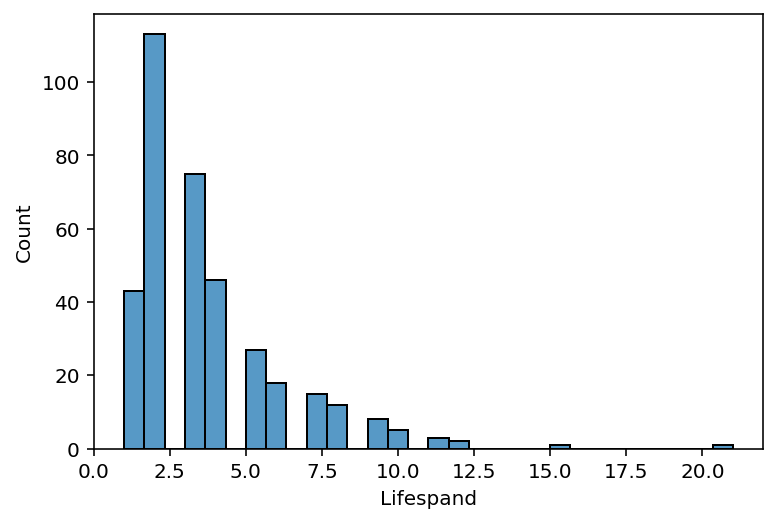

In [73]:
sns.histplot(disband_df['Lifespand'],bins=30)

In [75]:
disband_df['Lifespand'].mean()

3.6233062330623307